<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:

row, col = movies.shape
print("Num of Row: ",row)
print("Num of Column: ",col)

Num of Row:  979
Num of Column:  6


#### Check the data type of each column.

In [4]:
# Answer:

movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:

avgMovie = movies.duration.mean()
print("Average Movie Duration: ", avgMovie)

Average Movie Duration:  120.97957099080695


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer:

longMov = movies.duration.max()
shortMov = movies.duration.min()

print("Longest Movie Duration: ", longMov)
print("Shortest Movie Duration: ", shortMov)

Longest Movie Duration:  242
Shortest Movie Duration:  64


#### Create a histogram of duration, choosing an "appropriate" number of bins.

(array([ 25., 168., 301., 259., 111.,  66.,  27.,  14.,   5.,   3.]),
 array([ 64. ,  81.8,  99.6, 117.4, 135.2, 153. , 170.8, 188.6, 206.4,
        224.2, 242. ]),
 <BarContainer object of 10 artists>)

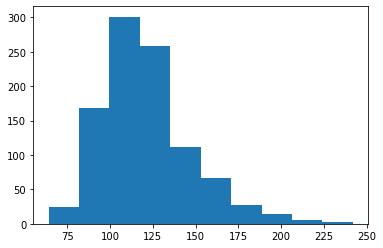

In [7]:
# Answer:

plt.hist(movies.duration, bins=10)

#### Use a box plot to display that same data.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

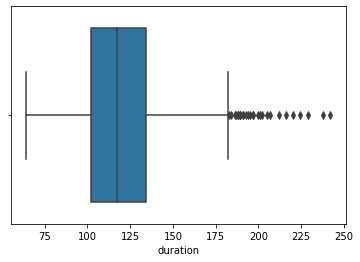

In [8]:
# Answer:

import seaborn as sns 
sns.boxplot(movies.duration)

## Intermediate level

#### Count how many movies have each of the content ratings.

In [9]:
# Answer:

movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0, 0.5, 'Number of Movies')

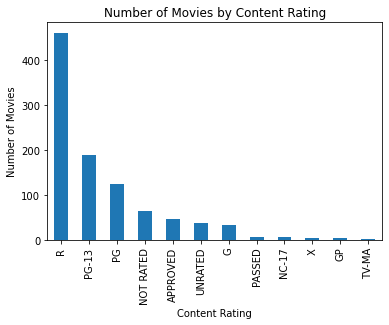

In [10]:
# Answer:

ratingMov = movies['content_rating'].value_counts()

ratingMov.plot(kind='bar', title='Number of Movies by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Number of Movies')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [11]:
# Answer:

movies.content_rating.replace(['NOT RATED','APPROVED','PASSED','GP'],'UNRATED', inplace=True)

In [12]:
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [13]:
# Answer:

movies.content_rating.replace(['X','TV-MA'],'NC-17', inplace=True)

In [14]:
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [15]:
# Answer:

movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [16]:
# Answer:

movies.content_rating.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
974    False
975    False
976    False
977    False
978    False
Name: content_rating, Length: 979, dtype: bool

In [17]:
movies.content_rating.fillna('UNRATED', inplace=True)

In [18]:
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    163
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [19]:
# Answer:

avgLongMov = movies[movies['duration'] >= 120].star_rating.mean()
avgShortMov = movies[movies['duration'] < 120].star_rating.mean()

print("Average Star Rating (More Than 2 Hours Movie):",avgLongMov)
print("Average Star Rating (More Than 2 Hours Movie):",avgShortMov)



Average Star Rating (More Than 2 Hours Movie): 7.948898678414082
Average Star Rating (More Than 2 Hours Movie): 7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

In [20]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


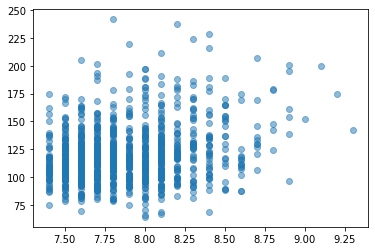

In [21]:
# Answer:

plt.scatter(movies['star_rating'], movies['duration'], alpha=0.5)
plt.show()

#### Calculate the average duration for each genre.

In [22]:
# Answer:

movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration', ylabel='content_rating'>

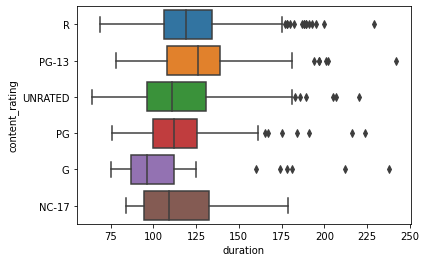

In [23]:
# Answer:

sns.boxplot(movies['duration'],movies['content_rating'])

#### Determine the top rated movie (by star rating) for each genre.

In [24]:
# Answer:

#movies.groupby('genre').duration.mean()

movies.sort_values('star_rating', ascending = False).groupby('genre').title.first()

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                        Modern Times
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [25]:
# Answer:

movies[movies.title.duplicated()].title

482    The Girl with the Dragon Tattoo
905                            Dracula
924                     Les Miserables
936                          True Grit
Name: title, dtype: object

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [26]:
# Answer:

movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [28]:
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

## Bonus

#### Figure out something "interesting" using the actors data!